In [1]:
import utils
import cv2
import model as m
import torch

In [2]:
utils.device

device(type='cuda')

In [22]:
maps_dataset_train = utils.ImageSet('maps',transform=utils.data_transforms['training'])
maps_dataloader_train = utils.DataLoader(maps_dataset_train,batch_size=1,shuffle=True)

In [23]:
model = m.Pix2Pix().to(device = utils.device)
model.train()
## In the paper the default number of epoch is 200
utils.train(model,100,maps_dataloader_train)

Epoch 1/100
----------
1096/1096: [===============================>] - ETA 0.1sss
Loss: 102.2195, generator loss: 34319.1311, discriminator loss: 102.2195.
Epoch 2/100
----------
1096/1096: [===============================>] - ETA 0.1ss
Loss: 111.3375, generator loss: 31131.9064, discriminator loss: 111.3375.
Epoch 3/100
----------
1096/1096: [===============================>] - ETA 0.1ss
Loss: 185.4786, generator loss: 29745.4762, discriminator loss: 185.4786.
Epoch 4/100
----------
1096/1096: [===============================>] - ETA 0.1ss
Loss: 135.5354, generator loss: 30067.5579, discriminator loss: 135.5354.
Epoch 5/100
----------
1096/1096: [===============================>] - ETA 0.1ss
Loss: 156.7288, generator loss: 29818.1172, discriminator loss: 156.7288.
Epoch 6/100
----------
1096/1096: [===============================>] - ETA 0.1ss
Loss: 164.8942, generator loss: 29057.7367, discriminator loss: 164.8942.
Epoch 7/100
----------
1096/1096: [===============================>] 

KeyboardInterrupt: 

In [24]:
model.eval()
maps_dataset_val = utils.ImageSet('maps',transform=utils.data_transforms['validation'],val_mode=True)
maps_dataloader_val = utils.DataLoader(maps_dataset_val,batch_size=1,shuffle =True)

In [56]:
img, real = next(iter(maps_dataloader_val))



In [57]:
img.shape

torch.Size([1, 3, 256, 256])

In [58]:
img[0]

tensor([[[0.7193, 0.6699, 0.8415,  ..., 0.7569, 0.7569, 0.7569],
         [0.7342, 0.7560, 0.7529,  ..., 0.7569, 0.7569, 0.7569],
         [0.7277, 0.7492, 0.7520,  ..., 0.7569, 0.7569, 0.7569],
         ...,
         [0.9442, 1.0000, 0.9900,  ..., 0.7317, 0.7580, 0.7135],
         [0.8973, 0.9915, 0.9998,  ..., 0.8003, 0.7420, 0.7355],
         [0.7169, 0.9537, 0.9853,  ..., 0.9647, 0.7575, 0.7038]],

        [[0.7663, 0.7091, 0.8807,  ..., 0.7961, 0.7961, 0.7961],
         [0.7815, 0.7956, 0.7924,  ..., 0.7961, 0.7961, 0.7961],
         [0.7904, 0.8120, 0.8119,  ..., 0.7961, 0.7961, 0.7961],
         ...,
         [0.9808, 0.9922, 0.9775,  ..., 0.7575, 0.7972, 0.7918],
         [0.9364, 0.9837, 0.9890,  ..., 0.8260, 0.7812, 0.8138],
         [0.7561, 0.9458, 0.9709,  ..., 0.9904, 0.7967, 0.7821]],

        [[0.7585, 0.7169, 0.8942,  ..., 0.8196, 0.8196, 0.8196],
         [0.7736, 0.8033, 0.8058,  ..., 0.8196, 0.8196, 0.8196],
         [0.7826, 0.8120, 0.8204,  ..., 0.8196, 0.8196, 0.

In [59]:
out = model.generator(img)

In [60]:
img = (img[0]+1)*0.5
real = (real[0]+1)*0.5
out = out[0]
img.shape

torch.Size([3, 256, 256])

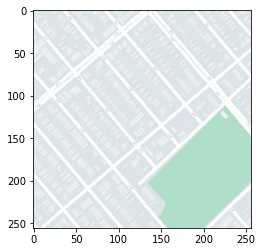

In [61]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


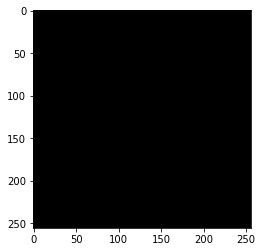

In [62]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

In [63]:
out = (out*0.5)+0.5

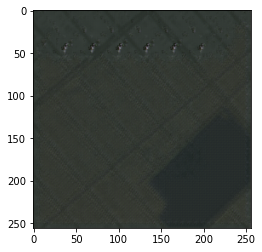

In [64]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

In [66]:
real

tensor([[[0.7428, 0.6701, 0.4604,  ..., 0.1877, 0.2943, 0.3021],
         [0.5607, 0.5173, 0.3685,  ..., 0.2446, 0.0806, 0.2195],
         [0.4287, 0.3592, 0.3936,  ..., 0.1213, 0.2519, 0.3164],
         ...,
         [0.2010, 0.2205, 0.3129,  ..., 0.2832, 0.3187, 0.1826],
         [0.2238, 0.2821, 0.3283,  ..., 0.2495, 0.1703, 0.2462],
         [0.3633, 0.3880, 0.4656,  ..., 0.4073, 0.3767, 0.3171]],

        [[0.7506, 0.6701, 0.4595,  ..., 0.2152, 0.3217, 0.3257],
         [0.5803, 0.5370, 0.3766,  ..., 0.2722, 0.1082, 0.2432],
         [0.4551, 0.3855, 0.4180,  ..., 0.1580, 0.2872, 0.3478],
         ...,
         [0.2441, 0.2676, 0.3600,  ..., 0.3278, 0.3541, 0.2061],
         [0.2669, 0.3291, 0.3754,  ..., 0.2940, 0.2057, 0.2697],
         [0.4064, 0.4350, 0.5126,  ..., 0.4518, 0.4121, 0.3407]],

        [[0.7506, 0.6701, 0.4595,  ..., 0.2006, 0.3100, 0.3217],
         [0.5764, 0.5331, 0.3765,  ..., 0.2576, 0.0964, 0.2393],
         [0.4512, 0.3816, 0.4141,  ..., 0.1420, 0.2754, 0.

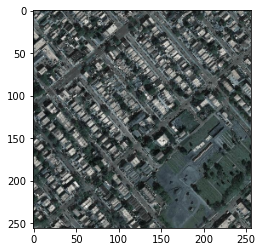

In [67]:
plt.imshow(real.permute(1,2,0).cpu())

In [68]:
img, real = next(iter(maps_dataloader_train))

In [69]:
out = model.generator(img)
img = (img[0]+1)*0.5
real = (real[0]+1)*0.5
out = out[0]
img.shape

torch.Size([3, 256, 256])

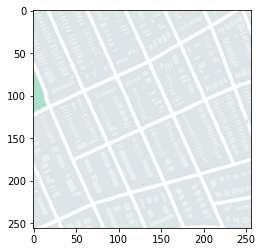

In [70]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


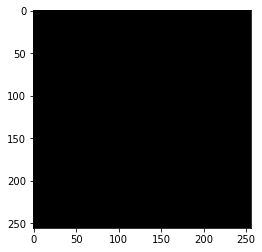

In [71]:
import matplotlib.pyplot as plt
plt.imshow(out.detach().permute(1,2,0).cpu())

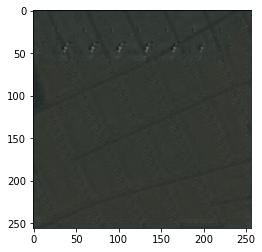

In [72]:
out = (out+1)*0.5
plt.imshow(out.detach().permute(1,2,0).cpu())

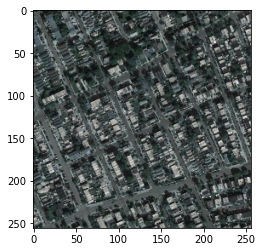

In [73]:
plt.imshow(real.permute(1,2,0).cpu())